# Telco Churn Project - Working Notebook
Project & Report Crated By: Rachel Robbins-Mayhill 2022-03-14

In [ ]:
Image

## PROJECT DESCRIPTION

With an ever-competitive business market, it is vital to understand your customer base and what drives them to stay with your company.  This can help you maximize retention and stabilize revenue in order to plan for next steps and continue to grow as a business. It is far less expensive to keep an existing customer than it is to acquire a new one for the long term. Therefore, it is important to identify drivers causing customers to leave your business. When you know WHY customers are leaving, you can take steps to help keep customers satisfied, ultimately preventing attrition and retaining current customers for the long term. Customer retention is not only important for maintaining revenue, but it allows room to continue to plan for growth while knowing you have a steady financial foundation. 

This report will identify key drivers of churn for the Telco dataset and use modeling and statistics to identify ways to prevent churn in the future. Churn is another term for attrition and is represented by the percentage of customers who stop doing business with the company. Ultimately this report will provide a recommendation that could be used by Telco or other customer-based service companies to decrease churn and maximize retention.

### PROJECT GOAL

The goal of this report is to identify key drivers of churn for Teleco, a telecommunications company, and make recommendations to reduce churn in order to increase customer retention, and ultimately increase revenue. Through machine learning and statistical analysis, predictions of future churn will be identified and recommendations for prevention will be made in order to improve customer retention.

### INITIAL QUESTIONS?????

To look at the data, some supporting programs are needed. The required supplemental libraries and modules are imported below.

In [1]:
# import python linraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# import modules and created functions
import acquire
import prepare


# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

# import machine-learning python library elements 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# eliminate pesky warnings about future changes to libraries from popping up
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# build a viz here setting the context of the data 

In [ ]:
print(acquire_df.churn.value_counts())
acquire_df.churn.value_counts().plot.bar()
plt.title('Overall Churn')
plt.xlabel('Churn')
plt.ylabel('# Of Customers')
plt.tight_layout()
plt.show()

---

## ACQUISITION & PREPARATION of DATA

#### I. Acquire the Data

The data for this report was acquired by accessing 'telco_churn' from the Codeup SQL database. By combining all columns from four tables within the database;`customers`, `contract_types`, `internet_service_types`, and `payment_types.`

In [2]:
acquire_df = acquire.get_telco_data()

Reading from csv file...


#### II. Prepare the Data

Once acquired, a new table (Dataframe) containing all necessary data was created.  This new table was then analyzed and adjusted to eliminate data errors, clarify confusion, and code non-numeric data into more useful numeric types. 

Some of the data correction strategies that were employed were:
    
- Addressing Missing Data
    - Dropping 11 missing values from total charges, as it was a very small portion of our data
    
- Dropping Unnecessary Columns
    - 'payment_type_id', 'internet_service_type_id', 'contract_type_id' had duplicate data, providing the same information as payment_type, internet_service_type, and contract_type 
    
- Rename Columns
    - Adding verbs 'is' or 'has' to column names for ease of data understanding after converting word values to numeric values
    
- Standardize Data Types
    - Adjusted monetary columns to have matching data types for ease of use
    
- Create Numeric Data Types for Data that was in Word From
    - The following columns needed to be transformed to numeric values: 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security','online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type'


#### Results of Preparing the Data
The results of the acquisition and preparation phases resulted in data that was ready to explore. 

In [3]:
df = prepare.clean_telco_data(acquire_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                7032 non-null   object 
 1   is_senior                                  7032 non-null   int64  
 2   tenure_months                              7032 non-null   int64  
 3   monthly_charges                            7032 non-null   float64
 4   total_charges                              7032 non-null   float64
 5   contract_type                              7032 non-null   object 
 6   internet_service_type                      7032 non-null   object 
 7   payment_type                               7032 non-null   object 
 8   is_male_Male                               7032 non-null   uint8  
 9   has_partner_Yes                            7032 non-null   uint8  
 10  has_dependents_Yes      

#### Segmenting Prepared Data

After cleaning-up the data, it is split into 3 samples;  train, validate, and test. 
- The train sample is used to explore, fit to models, and evaluate results without looking at new data.
- The validate sample is used to verify our models built are not overfit to the train dataset.
- The test set sample is used to give an estimate of how this model will perform on data it has never seen in the future.
- The samples are then separated into two groups with y representing the target variable and x representing the rest of the data.

In [4]:
# The number of rows and columns for each split is shown below.
train, validate, test = prepare.data_split(df)

train -> (3937, 34)
validate -> (1688, 34)
test -> (1407, 34)


In [5]:
# Set our X and y, in order to conduct evaluation and testing on our target variable. 
X_train, y_train = train.drop(columns='did_churn_Yes'), train['did_churn_Yes']
X_validate, y_validate = validate.drop(columns='did_churn_Yes'), validate['did_churn_Yes']

In [26]:
X_train.head().T

,5919,1915,5054,2355,6279
is_senior,0.0,0.00,0.00,0.0,1.0
tenure_months,58.0,71.00,35.00,1.0,20.0
monthly_charges,71.1,85.45,25.75,19.2,54.0
total_charges,4299.2,6028.95,882.55,19.2,1055.9
is_male_Male,0.0,1.00,0.00,1.0,1.0
has_partner_Yes,0.0,0.00,1.00,1.0,0.0
has_dependents_Yes,0.0,1.00,1.00,1.0,0.0
has_phone_service_Yes,1.0,1.00,1.00,1.0,1.0
has_multiple_lines_No phone service,0.0,0.00,0.00,0.0,0.0
has_multiple_lines_Yes,1.0,1.00,1.00,0.0,0.0


________

## DATA EXPLORATION - Data in Context

- Exploration started by looking at all data features and how they may have related to customer churn. 
- Looking at a correlation matrix of the features in connection with churn, we see a higher correlation with: 
    - Fiber Optic Internet - Positive Correlation 
    - Electronic Check - Postiive Correlation
    - Monthly Charges - Positive Correlation
    - Tenure Months - Negative Correlation


#### Correlations

In [28]:
df_corr = train.corr().reset_index()
corr_matrix = train.corr()
print(corr_matrix["did_churn_Yes"].sort_values(ascending=False))

did_churn_Yes                                1.000000
internet_service_type_Fiber optic            0.321678
payment_type_Electronic check                0.292306
monthly_charges                              0.196871
has_paperless_billing_Yes                    0.190075
is_senior                                    0.159932
has_multiple_lines_Yes                       0.053031
has_streaming_movies_Yes                     0.051348
has_streaming_tv_Yes                         0.038849
has_phone_service_Yes                        0.015906
is_male_Male                                 0.000008
has_multiple_lines_No phone service         -0.015906
has_device_protection_Yes                   -0.060108
has_online_backup_Yes                       -0.068519
payment_type_Mailed check                   -0.090324
payment_type_Credit card (automatic)        -0.127314
has_partner_Yes                             -0.143203
has_tech_support_Yes                        -0.159305
has_dependents_Yes          

#### Exploratory Questions
The correlation observations guided our exploratory questions.
1. Are Customers With Fiber Optic Internet More Likely to Churn?
2. Are Customers Who Pay More per Month More likely to Churn?
3. Are Month-to-Month Customers More Likely to Churn?
4. What is the Total Monthly Revenue for the Company?
5. What is the Amount of Monthly Revenue Lost by Those Who Have Churned?

### 1.  POSSIBLE DRIVER OF CHURN: Are Customers with Fiber Optic Internet More Likely to Churn?

#### Hypothesis

- H 0 : Churn for customers with fiber optic intenet <= churn of all customers
- H 𝑎 : Churn for customers with fiber optic intenet > churn of all customers

#### Visualization

Fiber optic    1722
DSL            1348
None            867
Name: internet_service_type, dtype: int64


Text(0, 0.5, '# of Customers')

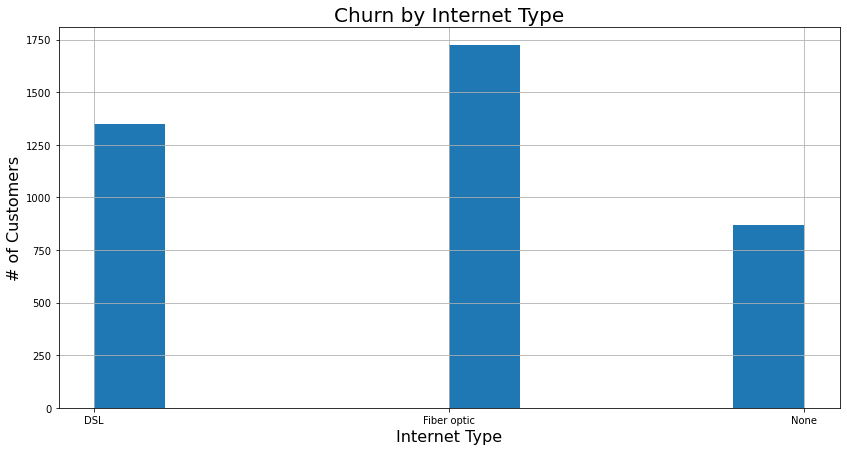

In [ ]:
print(train.internet_service_type.value_counts())

plt.figure(figsize=(14,7))
train.internet_service_type.hist()

plt.title('Churn by Internet Type', fontsize = 20)
plt.xlabel('Internet Type', fontsize = 16)
plt.ylabel('# of Customers', fontsize = 16)

#### Statistical Testing

In [9]:
observed = pd.crosstab(train['internet_service_type_Fiber optic'], train. did_churn_Yes)
alpha= 0.05
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

chi^2 = 405.9211
p     = 0.0000
We reject the hypothesis


### Answer: Customers with fiber optic internet are more likely to churn. 

---------

### 2.  POSSIBLE DRIVER OF CHURN: Are customers who pay more per month more likely to churn?

#### Hypothesis

- H$_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
- H$_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

#### Visualize

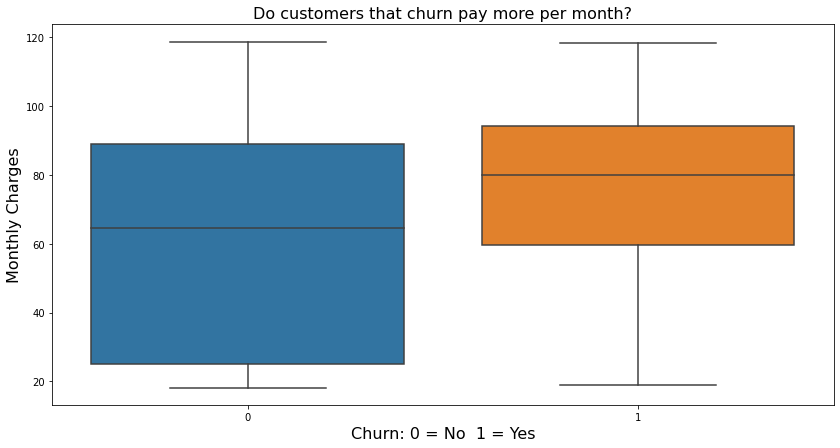

In [10]:
plt.figure(figsize=(14,7))
sns.boxplot(data=train, y='monthly_charges', x='did_churn_Yes')
plt.title('Do customers that churn pay more per month?',fontsize = 16)
plt.ylabel('Monthly Charges', fontsize = 16)
plt.xlabel('Churn: 0 = No  1 = Yes', fontsize = 16)
plt.show()

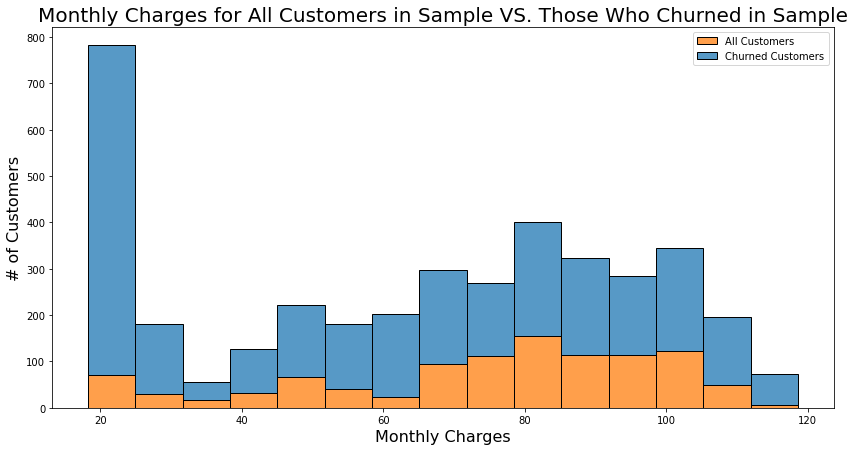

In [31]:
plt.figure(figsize=(14,7))
sns.histplot(train, x=train.monthly_charges, hue =  'did_churn_Yes', multiple = 'stack', legend = False)


plt.title('Monthly Charges for All Customers in Sample VS. Those Who Churned in Sample', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 16)
plt.ylabel('# of Customers', fontsize = 16)
plt.legend(labels = ['All Customers', 'Churned Customers'], loc= 'best')
plt.show()

#### Statistical Testing

In [11]:
# 1-Tailed, 1-Sample T-Test - Mean of Subgroup vs. Mean of Overall

alpha = 0.05
churn_sample = train[train.did_churn_Yes == 1].monthly_charges
overall_mean = train.monthly_charges.mean()
t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

13.037366230308015 2.0798982128378347e-36 0.05
We reject the null hypothesis.


### Answer: Customers who churn pay more in monthly charges.

-------

### 3.  POSSIBLE DRIVER OF CHURN: Are month-to-month customers more likely to churn?

#### Hypothesis

- H 0 : Churn for customers with month to month contracts <= churn of all customers
- H 𝑎 : Churn for customers with month to month contracts > churn of all customers

#### Visualization

In [12]:
print('Is there a relationship between contract type and churn?')
pd.crosstab(X_train.contract_type, y_train, normalize='index').style.background_gradient(cmap='Blues')

Is there a relationship between contract type and churn?


did_churn_Yes,0,1
contract_type,,
Month-to-month,0.571824,0.428176
One year,0.890798,0.109202
Two year,0.968652,0.031348


Text(0, 0.5, '# of Customers')

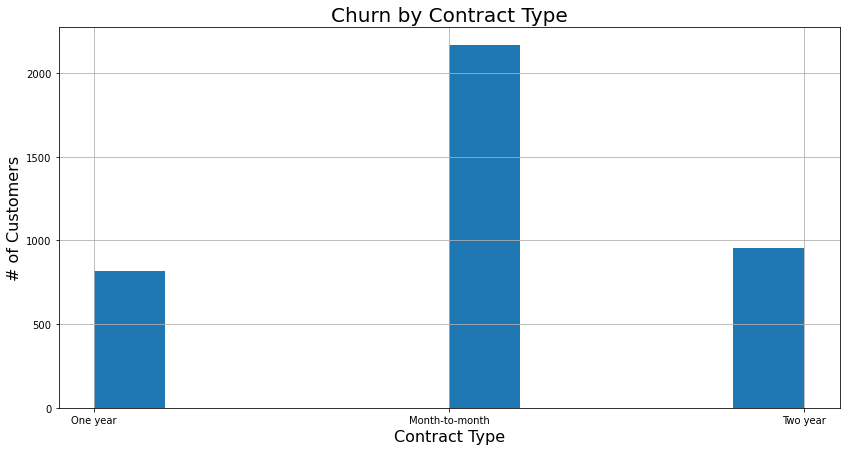

In [23]:
plt.figure(figsize=(14,7))
train.contract_type.hist()
plt.title('Churn by Contract Type', fontsize = 20)
plt.xlabel('Contract Type', fontsize = 16)
plt.ylabel('# of Customers', fontsize = 16)

### 4. OTHER PERTINENT QUESTIONS: What is the total monthly revenue for the company?

In [29]:
total_monthly_revenue_overall = acquire_df.monthly_charges.sum()
total_monthly_revenue_train = train.monthly_charges.sum()
print(f' Overal Total Monthly Revenue = {total_monthly_revenue_overall:.2f}')
print(f' Sample Total Monthly Revenue = {total_monthly_revenue_train:.2f}')

 Overal Total Monthly Revenue = 456116.60
 Sample Total Monthly Revenue = 255137.80


### 5. What is the amount of monthly revenue lost by those who have churned?

In [30]:
churn_monthly_revenue_lost_overall= acquire_df[acquire_df.churn == 'Yes'].monthly_charges.sum()
churn_monthly_revenue_lost_train = train[train.did_churn_Yes == 1].monthly_charges.sum()

print(f' Overall Total Monthly Revenue Lost to Churn = {churn_monthly_revenue_lost_overall:.2f}')
print(f' Sample Total Monthly Revenue Lost to Churn = {churn_monthly_revenue_lost_train:.2f}')

 Overall Total Monthly Revenue Lost to Churn = 139130.85
 Sample Total Monthly Revenue Lost to Churn = 78156.30


#### Summary - Who is more likely to churn?


## Predicting Churn
Because churn is a boolean/yes or no value, we will use classification machine learning algorithms to fit to our training data and we will evaluate on validate. We will pick the best model using accuracy because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong.

## ULTIMATE HYPOTHESIS
#### Fiber optic internet subscribers are more likely to churn.

_________

## DATA MODELING

In [21]:
# Set X and y variables for model testing. 
X_train, y_train = train.drop(columns=['contract_type', 'internet_service_type', 'payment_type','did_churn_Yes']), train['did_churn_Yes']
X_validate, y_validate = validate.drop(columns=['contract_type', 'internet_service_type', 'payment_type','did_churn_Yes']), validate['did_churn_Yes']
X_test, y_test = test.drop(columns=['contract_type', 'internet_service_type', 'payment_type','did_churn_Yes']), test['did_churn_Yes']

### Baseline
I will set a baseline prediction by predicting all customers will churn (churn == 0). I will evaluate the accuracy of that.

In [32]:
train.did_churn_Yes.value_counts()
baseline = y_train.mode()
matches_baseline_prediction = (y_train == 0)
baseline_accuracy = matches_baseline_prediction.mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.43%


### Models

The top 3 models we built were a decision tree, random forest, and logistical regression. The models differed in features and algorothms. 
- The random forest model performed the best at 79.6% accuracy on the validate data set, as you will see.

In [34]:
# Evaluate Random Forest models on train & validate set 
# by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    forest = forest.fit(X_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.734315,0.734005,0.000311
1,2,2,0.765304,0.751185,0.014119
2,3,3,0.787148,0.770142,0.017005
3,4,4,0.801880,0.781991,0.019889
4,5,5,0.808230,0.791469,0.016760
5,6,6,0.811786,0.786730,0.025056
6,7,7,0.815342,0.796209,0.019133
7,8,8,0.821184,0.791469,0.029714
8,9,9,0.828550,0.796209,0.032341
9,10,10,0.830328,0.796801,0.033527


None of these model appear to be overfit. The Random Forest Model that performed best had 10 samples_per_leaf and max_depth of 10, wiht train accuracy of 82.9% and validate accuracy of 80.0.% performing 6.47% better than baseline with validate. model performed the best on the validate sample, therefore, I moved forward with that model.

In [36]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
forest = RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train

# use the model and evaluate performance on validate
test_accuracy = forest.score(X_test, y_test)

print(f'test_accuracy: {test_accuracy: 2%}')

test_accuracy:  80.241649%


I expect this model to perform with 80% accuracy in the future on data it has not seen, given no major changes in our data source.

## Conclusion

Your notebook should begin with a project overview and goals and end with a conclusion that talks about your original goals and how you reached those (or didn't), the key findings, recommendations and next steps ("If I had more time, I would...")

### Summary

The goal of this report was to identify drivers of churn for Telco and to present reccomendations based on the findings.  
Through the process of data acquisition, preparation, exploration, and statistical testing, it was determined customers with 
- fiber optic internet 
- month-to-month contracts  
- and higher monthly blls 

are more at-risk of churn. By using machine learning modeling, predictions to prevent churn were made with 80% accuracy within the best performing model. Using the identified at-risk factors and modeling, a list of customers predicted to churn was created. This information is useful in developing mechanisms within marketing and customer retention teams to prevent churn. 

### Recommendations
It is reccomended each area of churn is addressed in order to maximize retention and stabalize revenenu. The followng reccomendations are based upon each risk factor identified.

- 1. Fiber optic internet: Send out electronic survey to fiber optic internet users, requesting feedback on internet service and quality satisfcation. 
    - Give $10 statement credit towards following month's bill for completion of survey.  
    - Collect data on survey results to move towards next steps of identifying the reason for high churn rate for fiber optic customers.
    
- 2. 


In [ ]:
Suggstions to consider 

### NEXT STEPS
If given more time, further exploration would be beneficial in the following areas:

- 1. Fiber-Optic_Internet: Identifyiing factors contributing to fiber-optic churn.
     - Is it related to internet service quality, price, add-on feature satisfaction, or some other factor?
- 
    

In [ ]:
#### - Customer-Base
1. What types of customers do we have?
2. What services do we offer?
_______
#### - Revenue
3. What is our total revenue?
4. What amount of revenue is impacted by the overall churn?

6. What amount of revenue is impacted by the customer base that churns the most?

8. What amount of revenue is impacted by the service type that churns the most?

Exploring through visualizations (report.ipynb)
At least 5 visualations are included in your final report.

The ones included answer a question (remember, NO is an answer) or provide necessary context (such as the distribution of the target variable). All statistical tests included in the final report should be supported with an visualization of the interaction of the variables being tested. Charts in the final report should have titles and labels that are descriptive and useful for the end user/audience/consumer of the report.

All visualizations in the final report are mentioned or discussed if a verbal presentation is given.

For example:

Was the phrase "women and children first" just a myth or did they really try to get out women and children first? If so, they would show as more likely to survive.
are women more likely to survive? plot barplot x-axis is sex and y-axis is survival rate
are children more likely to survive? bin age into 0-16, 17+, plot barplot on x-axis where y is survival rate (new variable = is_child)
run chi-square test sex + survival
run a chi-square test is_child + survival
run a t-test on age and survived
Do those who travel first class get quicker access to life boats?
Do families with small children get priority access? Even if they at the bottom of the boat in 3rd class?

Did traveling alone make a difference? Did it depend on sex? What was the survival rate for women traveling alone vs. men traveling along?

If families were more likely to be saved, is there a max family size where that benefit is lost?

Contextual questions: Did most people die or survive? How many men/women were on the boat? How many across different classes?

plot 3 subplots of proportions - pie/donut - survived, sex, class.
Statistical tests (report.ipynb)
At least 2 statistical tests are included in your final report.

The correct tests are run, given the data type and distribution, and the correct conclusions are drawn. For example (other tests may be used):

correlation: 2 continuous variables, normally distributed, testing for LINEAR correlation only (H_0: Not linearly dependent)

independent t-test: 1 continuous, somewhat normally distributed variable, one boolean variable, equal variance, independent (H_0: population mean of each group is equal)

chi-square test: 2 discrete variables. (H_0: the 2 variables are independent of each other).

Summary (report.ipynb)
Following your exploration section, you summarize your analysis (in a markdown cell using natural language): what you found and how you will use it moving forward.

This includes key takeaways from all the questions answered in explore, a list of which features will be used in modeling and why, and which features will not move forward and why. You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together.

Modeling
Select Evaluation Metric (Report.ipynb)
Clear communication as to how you evaluated and compared models.

What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy. If so, why? If you use multiple metrics, how will you decide which to select if metric is better for model A but another is better for model B? Will you rank them? Find a way to aggregate them into a single metric you can use to rank?

Evaluate Baseline (Report.ipynb)
Having a baseline tells you whether a model you build using the features you selected is any better than predicting by using only the target variable. One way a baseline is created in classification is by making predictions purely based on the most common outcome class, like predicting that all titanic passengers will die, becuase the majroity did die. By doing that, you end up with the highest accuracy without using extra information from features. The baseline is based on the training dataset. For a continuous target variable, the baseline could be predicting that all salaries will be the median salary of our labeled train data. The predictions should be made on the training data using this information (like the predicted value, y_hat, for all passengers "survived" == 0) and then performance evaluated to measure your models against. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.
Develop 3 Models (Report.ipynb)
The 3 models can differ based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data.
Evaluate on Train (Report.ipynb)
All models should be evaluated on train: the training sample is our largest sample, and it is a sample of data we have to both fit the model AND see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.
Evaluate on Validate (Report.ipynb)
*The top models should be evaluated with the validation sample dataset. It is important to use the validate sample for checking for any overfitting that may have occurred when fitting the model on train. If you are creating 10's of models, it is also important to only validate a handful of your top models with the Validate dataset. Otherwise, your data will have seen validate as much as train and you could accidentally introduce some implicit bias based on data and results you see while validating on so many models. *
Evaluate Top Model on Test (Report.ipynb)
Your top performing model, and only your top performing model should be evaluated on your test dataset. The purpose of having a test dataset to evaluate only the final model on is to have an estimate of how the model will perform in the future on data it has never seen.
Report (Final Notebook)
code commenting (Report.ipynb)
Your code contains code comments that are helpful to the reader in understanding what each blocks/lines of code are doing.
markdown (Report.ipynb)
Notebook contains adequate markdown that documents your thought process, decision making, and navigation through the pipeline. This should be present throughout the notebook consistently, wtih not just headers, but plenty of content that guides the reader and leaves no questions or doubt as to why you did something, e.g.
Written Conclusion Summary (Report.ipynb)
Your conclusion summary should addresses the questions you raised in the opening of the project, which we would want to see at the end of every final notebook. Ideally, when the deliverable is a report, the summary should tie together your analysis, the drivers of the outcome, and how you would expect your ML model to perform in the future on unseen data, in layman's terms.
conclusion recommendations (Report.ipynb)
Your notebook should ends with a conclusion that contains actionable recommendations based on your insights and analysis to the business stakeholder(s), your simulated audience, or someone who would find this information valuable (if there is no stakeholder). Your recommendations should not be not about what to do differently with the data, but instead should be based on the business or domain you are studying.
conclusion next steps (Report.ipynb)
Your conclusion should include next steps from a data science perspective that will assist in improving your research. Ideally, if you talk about trying more algorithms to improve performance, think about why you need to improve performance. And if the business calls for it, remember the best way to improve performance is to have better predictors/features. If you talk about gathering more data, being specific about what data you think will help you understand the problem better and why is the way to go!
no errors (Report.ipynb)
Your final notebook should run without error. One error in a notebook can lead to the rest of it erroring out. If you have a reader who doesn't know python, they will then not be able to consume your report.

Final Report (.ipynb) (see details above in the "Jupyter Notebook Report"

A Report that has filtered out all the extraneous elements not necessary to include in the report.

Use markdown throughout the notebook to guide the audience. Assume the reader will not read your code blocks as you think about how much markdown guidance do you need.

Then, assume another reader will read ALL of your code, so make sure it is very very clearly commented. All cells with code need comments.